# Intuitive Machines Inc. LUNR 日足

In [1]:
import sys
sys.path.append('..')

import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

In [2]:
pattern = re.compile(r'(.+)\.T')

symbol = 'LUNR'
ticker = yf.Ticker(symbol)

df = ticker.history(period='3mo')
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-10 00:00:00-04:00,7.790,7.891,6.64,6.78,25083700,0.0,0.0
2025-03-11 00:00:00-04:00,6.720,7.040,6.26,6.48,20201700,0.0,0.0
2025-03-12 00:00:00-04:00,6.825,7.650,6.53,7.42,21057400,0.0,0.0
2025-03-13 00:00:00-04:00,7.260,7.350,6.58,6.70,13775800,0.0,0.0
2025-03-14 00:00:00-04:00,6.905,7.340,6.81,7.31,10804559,0.0,0.0


## 日足チャートとパラボリック SAR

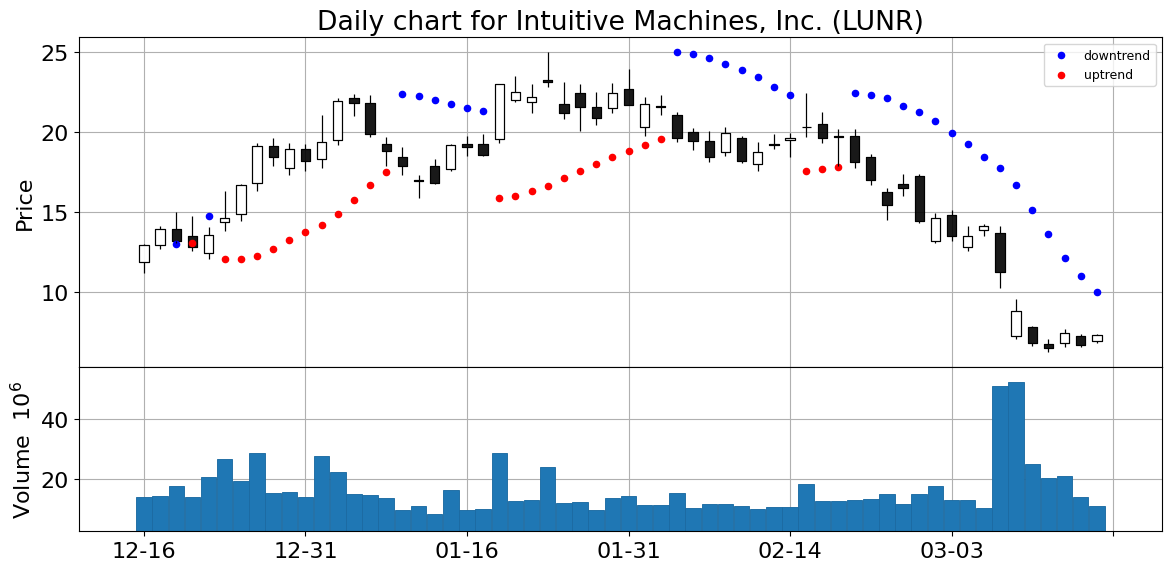

In [3]:
dict_psar = psar(df)

plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

apds  = [
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=20,
        color='blue',
        label='downtrend',
        ax=ax[0]
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=20,
        color='red',
        label='uptrend',
        ax=ax[0]
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=ax[1],
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Daily chart for %s (%s)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Daily chart for %s' % symbol)

ax[0].legend(loc='best', fontsize=9)


plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('daily_chart_%s.png' % m.group(1))
else:
    plt.savefig('daily_chart_%s.png' % symbol)

plt.show()

In [4]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-14 00:00:00-04:00,6.905,7.34,6.81,7.31,10804559,0.0,0.0


In [35]:
df.tail(2)['Close']

Date
2025-03-06 00:00:00-05:00    11.260
2025-03-07 00:00:00-05:00     8.805
Name: Close, dtype: float64

In [19]:
df.tail(2)['Close'].diff()

Date
2025-03-06 00:00:00-05:00      NaN
2025-03-07 00:00:00-05:00   -2.515
Name: Close, dtype: float64

In [20]:
df['Close'].rolling(5).mean().tail(2)

Date
2025-03-06 00:00:00-05:00    13.376
2025-03-07 00:00:00-05:00    12.209
Name: Close, dtype: float64

In [9]:
df['Close'].rolling(25).mean().tail(2)

Date
2025-01-24 00:00:00-05:00    63.8474
2025-01-27 00:00:00-05:00    63.6620
Name: Close, dtype: float64